In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import phoenix as px
import os
import json
from tqdm import tqdm
from phoenix.evals import (
    TOOL_CALLING_PROMPT_TEMPLATE, 
    llm_classify,
    OpenAIModel
)
from phoenix.trace import SpanEvaluations
from phoenix.trace.dsl import SpanQuery
from openinference.instrumentation import suppress_tracing

import nest_asyncio
nest_asyncio.apply()

In [12]:
PROJECT_NAME="evaluating-agent"

In [4]:
from utils import run_agent, start_main_span, tools, get_phoenix_endpoint

🔭 OpenTelemetry Tracing Details 🔭
|  Phoenix Project: evaluating-agent
|  Span Processor: SimpleSpanProcessor
|  Collector Endpoint: http://localhost:6006/v1/traces
|  Transport: HTTP + protobuf
|  Transport Headers: {}
|  
|  Using a default SpanProcessor. `add_span_processor` will overwrite this default.
|  
|  `register` has set this TracerProvider as the global OpenTelemetry default.
|  To disable this behavior, call `register` with `set_global_tracer_provider=False`.



In [5]:
sessions=px.launch_app()

🌍 To view the Phoenix app in your browser, visit http://localhost:6006/
📖 For more information on how to use Phoenix, check out https://docs.arize.com/phoenix


In [6]:
import pandas as pd
import duckdb
transaction_path='/home/toan999/coding/Agent/Store_Sales_Price_Elasticity_Promotions_Data.parquet'
df = pd.read_parquet(transaction_path)
table_name='sales'
duckdb.sql(f"SELECT * from df")

┌──────────────┬───────────┬────────────────────┬────────────┬──────────┬──────────────────┬──────────┐
│ Store_Number │ SKU_Coded │ Product_Class_Code │ Sold_Date  │ Qty_Sold │ Total_Sale_Value │ On_Promo │
│    int16     │   int32   │       int16        │    date    │  int16   │      float       │   int8   │
├──────────────┼───────────┼────────────────────┼────────────┼──────────┼──────────────────┼──────────┤
│         1320 │   6172800 │              22875 │ 2021-11-02 │        3 │            56.85 │        0 │
│         2310 │   6172800 │              22875 │ 2021-11-03 │        1 │            18.95 │        0 │
│         3080 │   6172800 │              22875 │ 2021-11-03 │        1 │            18.95 │        0 │
│         2310 │   6172800 │              22875 │ 2021-11-06 │        1 │            18.95 │        0 │
│         4840 │   6172800 │              22875 │ 2021-11-07 │        1 │            18.95 │        0 │
│         1320 │   6172800 │              22875 │ 2021-11-08 │  

In [7]:
agent_question=[
    "What SKU has the highest sales?",
    "What store has the highest sales?",
    "What store spend most on Promotion?",
    "What is the trend of sales by month?",
    "What was the average transacion value?"
]

In [8]:
for q in tqdm(agent_question, desc="Processing Question"):
    try:
        ret=start_main_span([{"role":"user", "content":q}])
    except Exception as e:
        print(f"Error processing question: {q}")
        print(e)
        continue

Processing Question:   0%|                                | 0/5 [00:00<?, ?it/s]

Starting main span with messages: [{'role': 'user', 'content': 'What SKU has the highest sales?'}]
Running agent with messages:[{'role': 'user', 'content': 'What SKU has the highest sales?'}]
Making router call to OpenAI
Received response with tool calls: lookup_sales_data and call_6zofj1lUDmRGHrMf2oVyK9sq
Processing tool calls
Making router call to OpenAI
Received response with tool calls: analyze_sales_data and call_cB2gQsPBF45HRn84iyNADr5b
Processing tool calls
Making router call to OpenAI


Processing Question:  20%|████▊                   | 1/5 [00:13<00:54, 13.67s/it]

No tool calls, returning final response
Starting main span with messages: [{'role': 'user', 'content': 'What store has the highest sales?'}]
Running agent with messages:[{'role': 'user', 'content': 'What store has the highest sales?'}]
Making router call to OpenAI
Received response with tool calls: lookup_sales_data and call_PERyhD7BEEAyxzQ38VGwyt9s
Processing tool calls
Making router call to OpenAI


Processing Question:  40%|█████████▌              | 2/5 [00:16<00:22,  7.43s/it]

No tool calls, returning final response
Starting main span with messages: [{'role': 'user', 'content': 'What store spend most on Promotion?'}]
Running agent with messages:[{'role': 'user', 'content': 'What store spend most on Promotion?'}]
Making router call to OpenAI
Received response with tool calls: lookup_sales_data and call_AnDPuqdWfqggWQ5YiSC4VQsY
Processing tool calls
Making router call to OpenAI


Processing Question:  60%|██████████████▍         | 3/5 [00:19<00:10,  5.49s/it]

No tool calls, returning final response
Starting main span with messages: [{'role': 'user', 'content': 'What is the trend of sales by month?'}]
Running agent with messages:[{'role': 'user', 'content': 'What is the trend of sales by month?'}]
Making router call to OpenAI
Received response with tool calls: lookup_sales_data and call_JwLnNEc6htGvyOR9wRRIhR4k
Processing tool calls
Making router call to OpenAI
Received response with tool calls: lookup_sales_data and call_b9XashphMk2v2ppE2ualG2HM
Processing tool calls
Making router call to OpenAI
Received response with tool calls: lookup_sales_data and call_vE3SPwONGPXz8tejyu7csMec
Processing tool calls
Making router call to OpenAI
Received response with tool calls: analyze_sales_data and call_Ip20zk6cUbjW5egREClQojuM
Processing tool calls
Making router call to OpenAI
Received response with tool calls: generate_visualization and call_I4hzKIDuKDc1X3HdHlWmgI7H
Processing tool calls
Making router call to OpenAI


Processing Question:  80%|███████████████████▏    | 4/5 [01:22<00:27, 27.98s/it]

No tool calls, returning final response
Starting main span with messages: [{'role': 'user', 'content': 'What was the average transacion value?'}]
Running agent with messages:[{'role': 'user', 'content': 'What was the average transacion value?'}]
Making router call to OpenAI
Received response with tool calls: lookup_sales_data and call_yUK3qlWZDabvE1jA6idXPVaI
Processing tool calls
Making router call to OpenAI


Processing Question: 100%|████████████████████████| 5/5 [01:25<00:00, 17.05s/it]

No tool calls, returning final response


In [9]:
print(TOOL_CALLING_PROMPT_TEMPLATE)


You are an evaluation assistant evaluating questions and tool calls to
determine whether the tool called would answer the question. The tool
calls have been generated by a separate agent, and chosen from the list of
tools provided below. It is your job to decide whether that agent chose
the right tool to call.

    [BEGIN DATA]
    ************
    [Question]: {question}
    ************
    [Tool Called]: {tool_call}
    [END DATA]

Your response must be single word, either "correct" or "incorrect",
and should not contain any text or characters aside from that word.
"incorrect" means that the chosen tool would not answer the question,
the tool includes information that is not presented in the question,
or that the tool signature includes parameter values that don't match
the formats specified in the tool signatures below.

"correct" means the correct tool call was chosen, the correct parameters
were extracted from the question, the tool call generated is runnable and correct,
and tha

In [31]:
query = SpanQuery().where(
    # Filter for the `LLM` span kind.
    # The filter condition is a string of valid Python boolean expression.
    "span_kind == 'LLM'",
).select(
    question="input.value",
    tool_call="llm.tools"
)

# The Phoenix Client can take this query and return the dataframe.
tool_calls_df = px.Client().query_spans(query, 
                                        project_name=PROJECT_NAME, 
                                        timeout=None)
tool_calls_df = tool_calls_df.dropna(subset=["tool_call"])

tool_calls_df.head()

,question,tool_call
context.span_id,,
7da96be8cdd9ef07,"{""messages"": [{""role"": ""user"", ""content"": ""Wha...","[{'tool': {'json_schema': '{""type"": ""function""..."
5c8c45ec5e175492,"{""messages"": [{""role"": ""user"", ""content"": ""Wha...","[{'tool': {'json_schema': '{""type"": ""function""..."
bc25ec87f1b7aecd,"{""messages"": [{""role"": ""user"", ""content"": ""Wha...","[{'tool': {'json_schema': '{""type"": ""function""..."
685d9bead6375b5f,"{""messages"": [{""role"": ""user"", ""content"": ""Wha...","[{'tool': {'json_schema': '{""type"": ""function""..."
c6617f16118ebb6d,"{""messages"": [{""role"": ""user"", ""content"": ""Wha...","[{'tool': {'json_schema': '{""type"": ""function""..."


In [55]:
# with suppress_tracing():
#     tool_call_eval = llm_classify(
#         dataframe = tool_calls_df,
#         template = TOOL_CALLING_PROMPT_TEMPLATE.template[0].template.replace("{tool_definitions}", 
#                                                                  json.dumps(tools).replace("{", '"').replace("}", '"')),
#         rails = ['correct', 'incorrect'],
#         model=OpenAIModel(model="gpt-4o"),
#         provide_explanation=True
#     )

# tool_call_eval['score'] = tool_call_eval.apply(lambda x: 1 if x['label']=='correct' else 0, axis=1)

# tool_call_eval.head()

with suppress_tracing():
    tool_call_eval=llm_classify(
        dataframe=tool_calls_df,
        template=TOOL_CALLING_PROMPT_TEMPLATE.template[00].template.replace("{tool_definitions}",json.dumps(tools).replace("{", '"').replace("}",'"')),
        rails=["correct", "incorrect"],
        model=OpenAIModel(model="gpt-4o"),
        provide_explanation=True
    )
tool_call_eval['score']=tool_call_eval.apply(lambda x: 1 if x["label"]=="correct" else 0, axis=1)

llm_classify |          | 0/15 (0.0%) | ⏳ 00:00<? | ?it/s

In [57]:
pd.set_option('display.max_colwidth', 0)
tool_call_eval

,label,explanation,exceptions,execution_status,execution_seconds,score
context.span_id,,,,,,
7da96be8cdd9ef07,correct,"The question asks for the SKU with the highest sales, which requires analyzing the sales data to extract insights. The correct tool to call would be 'analyze_sales_data' after retrieving the data with 'lookup_sales_data'. The tool call sequence provided includes both 'lookup_sales_data' and 'analyze_sales_data', which is correct for answering the question.",[],COMPLETED,6.395794,1
5c8c45ec5e175492,incorrect,"The question asks for the SKU with the highest sales, which requires analyzing the sales data to determine which SKU has the highest sales. The 'lookup_sales_data' tool is used to retrieve data, but it does not perform analysis to find the SKU with the highest sales. The 'analyze_sales_data' tool would be more appropriate for extracting insights such as identifying the SKU with the highest sales.",[],COMPLETED,6.394909,0
bc25ec87f1b7aecd,incorrect,"The question asks for the SKU with the highest sales. The first tool call used 'lookup_sales_data' with the prompt, which is correct as it attempts to retrieve relevant sales data. However, the response from this tool call only provided a single SKU without any sales data. The second tool call 'analyze_sales_data' was then used to analyze the sales data, but it was based on the incorrect assumption that the single SKU provided was the one with the highest sales. The tool call did not actually analyze multiple SKUs to determine which had the highest sales, as the question required. Therefore, the tool calls did not correctly address the question.",[],COMPLETED,6.395812,0
685d9bead6375b5f,correct,"The question asks for the store with the highest sales, which requires analyzing the sales data to extract insights. The tool call sequence includes both 'lookup_sales_data' and 'analyze_sales_data', which is appropriate for this question. The 'lookup_sales_data' tool is used to retrieve the data, and 'analyze_sales_data' is used to analyze it to find the store with the highest sales. Therefore, the tool calls are correct.",[],COMPLETED,6.395761,1
c6617f16118ebb6d,correct,"The tool 'lookup_sales_data' is appropriate for the question 'What store has the highest sales?' because it is designed to look up data from the Store Sales Price Elasticity Promotions dataset, which is necessary to determine which store has the highest sales. The tool call includes the correct parameter, which is the unchanged prompt from the user.",[],COMPLETED,16.167294,1
7494429344c18492,correct,"The question asks which store spends the most on promotion. To answer this, the data needs to be analyzed to extract insights about promotional spending. The tool call sequence includes 'lookup_sales_data' to retrieve the data and 'analyze_sales_data' to analyze it, which is appropriate for answering the question. Therefore, the tool call is correct.",[],COMPLETED,6.395711,1
2235a496b12d0645,correct,"The tool 'lookup_sales_data' is appropriate for the question 'What store spend most on Promotion?' because it is designed to look up data from the Store Sales Price Elasticity Promotions dataset, which would include information on promotional spending by store. The tool call correctly uses the prompt parameter to pass the user's question unchanged, which aligns with the tool's requirements.",[],COMPLETED,18.480565,1
6cb978b67d3bd98f,correct,"The question asks for the trend of sales by month, which implies a need for analysis or visualization of the sales data over time. The tool calls include 'lookup_sales_data', 'analyze_sales_data', and 'generate_visualization'. The correct sequence would be to first look up the data, then analyze it or generate a visualization to show the trend. The tool calls listed include all necessary steps to answer the question, making the choice correct.",[],COMPLETED,6.395713,1
7f00bcab4d77e222,incorrect,"The question asks for the trend of sales by month, which implies a need for an

In [56]:
# px.Client().log_evaluations(
#     SpanEvaluations(eval_name="Tool Calling Eval", dataframe=tool_call_eval),
# )

px.Client().log_evaluations(
    SpanEvaluations(eval_name="Tool Calling Eval", dataframe=tool_call_eval)
)

In [60]:
# check codes generated by LLM for visualization

query = SpanQuery().where(
    # Filter for the `LLM` span kind.
    # The filter condition is a string of valid Python boolean expression.
    "name == 'generate_visualization'",
).select(
    code="output.value"
)

runnable_code_df = px.Client().query_spans(query, 
                                        project_name=PROJECT_NAME, 
                                        timeout=None)
runnable_code_df

,code
context.span_id,
86924d6f32f18acf,"import pandas as pd\nimport matplotlib.pyplot as plt\nfrom io import StringIO\n\n# Configuration\nconfig = {\n 'chart_type': 'line',\n 'x_axis': 'date',\n 'y_axis': 'value',\n 'title': 'Visualize the trend of sales by month',\n 'data': 'Sales_Month,Total_Qty_Sold,Total_Sale_Value\n2021-11-01,43056.0,499984.428193\n2021-12-01,75724.0,910982.118423\n2022-01-01,38016.0,460090.187698\n2022-02-01,31257.0,405419.077911\n2022-03-01,31838.0,412956.587351\n2022-04-01,30147.0,371117.707672\n2022-05-01,24847.0,324769.278198\n2022-06-01,26293.0,324996.188044\n2022-07-01,27789.0,346132.107986\n2022-08-01,28782.0,368018.057711\n2022-09-01,32153.0,403554.177320\n2022-10-01,34825.0,462807.737202\n2022-11-01,41119.0,530981.688150\n2022-12-01,58171.0,884818.399738\n2023-01-01,33653.0,434172.808300\n2023-02-01,31545.0,411762.718244\n2023-03-01,32460.0,423070.838309\n2023-04-01,30199.0,384479.678311\n2023-05-01,31154.0,381326.428023\n2023-06-01,29082.0,364806.737856\n2023-07-01,27932.0,353284.207838\n2023-08-01,31903.0,401061.537729\n2023-09-01,31847.0,422554.967469\n2023-10-01,38208.0,454231.057104\n2023-11-01,41043.0,511104.287418\n2023-12-01,60941.0,874263.668331\n2024-01-01,33408.0,431060.297344\n2024-02-01,29673.0,364920.387787\n2024-03-01,28984.0,353913.047900\n'\n}\n\n# Read data\ndata = pd.read_csv(StringIO(config['data']))\ndata['Sales_Month'] = pd.to_datetime(data['Sales_Month'])\n\n# Plot\nplt.figure(figsize=(10, 6))\nplt.plot(data['Sales_Month'], data['Total_Sale_Value'], marker='o')\nplt.title(config['title'])\nplt.xlabel('Date')\nplt.xticks(rotation=45)\nplt.ylabel('Total Sale Value')\nplt.grid()\nplt.tight_layout()\nplt.show()"


In [61]:
def code_is_runnable(output: str) -> bool:
    try:
        exec(output)
        return True
    except Error as e:
        print(e)
        return False

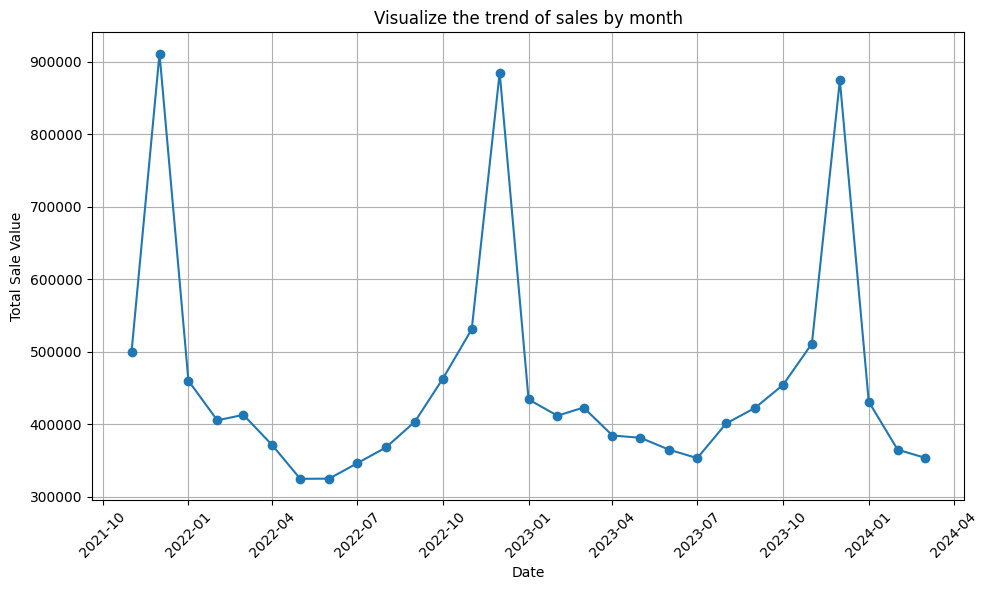

,code,label,score
context.span_id,,,
86924d6f32f18acf,"import pandas as pd\nimport matplotlib.pyplot as plt\nfrom io import StringIO\n\n# Configuration\nconfig = {\n 'chart_type': 'line',\n 'x_axis': 'date',\n 'y_axis': 'value',\n 'title': 'Visualize the trend of sales by month',\n 'data': 'Sales_Month,Total_Qty_Sold,Total_Sale_Value\n2021-11-01,43056.0,499984.428193\n2021-12-01,75724.0,910982.118423\n2022-01-01,38016.0,460090.187698\n2022-02-01,31257.0,405419.077911\n2022-03-01,31838.0,412956.587351\n2022-04-01,30147.0,371117.707672\n2022-05-01,24847.0,324769.278198\n2022-06-01,26293.0,324996.188044\n2022-07-01,27789.0,346132.107986\n2022-08-01,28782.0,368018.057711\n2022-09-01,32153.0,403554.177320\n2022-10-01,34825.0,462807.737202\n2022-11-01,41119.0,530981.688150\n2022-12-01,58171.0,884818.399738\n2023-01-01,33653.0,434172.808300\n2023-02-01,31545.0,411762.718244\n2023-03-01,32460.0,423070.838309\n2023-04-01,30199.0,384479.678311\n2023-05-01,31154.0,381326.428023\n2023-06-01,29082.0,364806.737856\n2023-07-01,27932.0,353284.207838\n2023-08-01,31903.0,401061.537729\n2023-09-01,31847.0,422554.967469\n2023-10-01,38208.0,454231.057104\n2023-11-01,41043.0,511104.287418\n2023-12-01,60941.0,874263.668331\n2024-01-01,33408.0,431060.297344\n2024-02-01,29673.0,364920.387787\n2024-03-01,28984.0,353913.047900\n'\n}\n\n# Read data\ndata = pd.read_csv(StringIO(config['data']))\ndata['Sales_Month'] = pd.to_datetime(data['Sales_Month'])\n\n# Plot\nplt.figure(figsize=(10, 6))\nplt.plot(data['Sales_Month'], data['Total_Sale_Value'], marker='o')\nplt.title(config['title'])\nplt.xlabel('Date')\nplt.xticks(rotation=45)\nplt.ylabel('Total Sale Value')\nplt.grid()\nplt.tight_layout()\nplt.show()",runable,1


In [63]:
runnable_code_df['label']=runnable_code_df['code'].apply(code_is_runnable).map({True: 'runable', False: 'not_runable'})
runnable_code_df['score']=runnable_code_df['label'].map({'runable': 1, 'not_runable':0})
runnable_code_df

In [64]:
px.Client().log_evaluations(
    SpanEvaluations(eval_name="Code Run Eval", dataframe=runnable_code_df)
)

In [71]:
query = SpanQuery().where(
    # Filter for the `LLM` span kind.
    # The filter condition is a string of valid Python boolean expression.
    "name == 'analyze_sales_data'",
).select(
    response="output.value",
    query="input.value"
)

analysis_df=px.Client().query_spans(query, project_name=PROJECT_NAME, timeout=None)
analysis_df

,response,query
context.span_id,,
b0cf53dea6e8cfed,"To analyze the sales data for the SKU provided (6187450) and determine the total sales and identify the SKU with the highest total sales, we need to follow these steps:\n\n1. **Data Collection**: Gather sales data that includes sales transactions associated with the SKU you have (6187450). This data should include columns like SKU number, sale amount, transaction date, etc.\n\n2. **Data Aggregation**: Calculate the total sales for each SKU by summing the sales amounts for each SKU.\n\n3. **Sorting**: Once total sales are calculated, sort the results to find the SKU with the highest sales.\n\nSince I don't have access to your sales data, I'll guide you on how you might execute this in Python or using a spreadsheet application (like Excel).\n\n### Example Process in Python\n\nAssuming you have the sales data in a DataFrame format (using Pandas):\n\n```python\nimport pandas as pd\n\n# Sample sales data\ndata = {\n 'SKU_Coded': [6187450, 6187450, 6187450, 6187451, 6187451],\n 'Sales_Amount': [100, 150, 200, 300, 400]\n}\n\n# Create a DataFrame\ndf = pd.DataFrame(data)\n\n# Calculate total sales for each SKU\ntotal_sales = df.groupby('SKU_Coded')['Sales_Amount'].sum().reset_index()\n\n# Identify SKU with the highest total sales\nhighest_sales_sku = total_sales.loc[total_sales['Sales_Amount'].idxmax()]\n\nprint(f""Total sales for each SKU:\n {total_sales}"")\nprint(f""SKU with the highest total sales: {highest_sales_sku['SKU_Coded']} - Total Sales: {highest_sales_sku['Sales_Amount']}"")\n```\n\n### Example Process in Excel\n\n1. **Input Data**: Create a table with columns for SKU and Sales Amount.\n2. **Use the SUMIF or SUMIFS Function**: You can use `=SUMIF(range, criteria, sum_range)` to sum the sales for each SKU.\n3. **Create a Summary Table**: List each SKU and calculate the total sales next to it.\n4. **Identify Maximum Sales**: Use a MAX function or conditional formatting to highlight the SKU with the most sales.\n\n### Conclusion\n\nOnce you execute either approach, you will have the total sales for each SKU, and you'll be able to identify which SKU has the highest total sales. If you provide the actual sales data, I can assist further with analysis.","{""prompt"": ""Analyze the sales data to determine the total sales for each SKU and identify the SKU with the highest total sales."", ""data"": "" SKU_Coded\n0 6187450""}"
ad47c7f37707980d,"To analyze the trend of sales by month based on the provided data, we can observe both the **Total Quantity Sold** and the **Total Sale Value** over time. Here's a summary of the findings:\n\n### Overall Trend Analysis\n\n1. **General Trend**: \n - From November 2021 until March 2024, there are periods of increase and decline in sales data but an overall upward trend in both the total quantity sold and total sale value.\n\n2. **Monthly Breakdown**:\n\n - **Late 2021 to Early 2022**: \n - November and December 2021 saw strong sales, with December peaking at **75,724 units sold** and a sales value of **$910,982**. This sets a high standard for the next few months.\n\n - **2022 Monthly Trends**:\n - **January to March 2022**: Sales saw a significant drop in January to **38,016 units sold**. However, it fluctuated slightly in February and March before stabilizing.\n - **April to June 2022**: A continued decline in quantity sold, hitting a low of **24,847** in May. The sales value followed a similar trend, reflecting lower demand.\n - **July to December 2022**: Sales began to recover, culminating with **58,171 units** sold in December, suggesting a re-invigoration in demand towards the year's end, reflected also in the significant sales value of **$884,818**.\n\n - **2023 Monthly Trends**:\n - Early 2023 began a varied month-on-month trend, with low quantities sold but rising values indicative of potentially higher prices or valuable products.\n - February and March show slight decreases in quantity but are stable in sales value. From April onw

In [72]:
CLARITY_LLM_JUDGE_PROMPT = """
In this task, you will be presented with a query and an answer. Your objective is to evaluate the clarity 
of the answer in addressing the query. A clear response is one that is precise, coherent, and directly 
addresses the query without introducing unnecessary complexity or ambiguity. An unclear response is one 
that is vague, disorganized, or difficult to understand, even if it may be factually correct.

Your response should be a single word: either "clear" or "unclear," and it should not include any other 
text or characters. "clear" indicates that the answer is well-structured, easy to understand, and 
appropriately addresses the query. "unclear" indicates that some part of the response could be better 
structured or worded.
Please carefully consider the query and answer before determining your response.

After analyzing the query and the answer, you must write a detailed explanation of your reasoning to 
justify why you chose either "clear" or "unclear." Avoid stating the final label at the beginning of your 
explanation. Your reasoning should include specific points about how the answer does or does not meet the 
criteria for clarity.

[BEGIN DATA]
Query: {query}
Answer: {response}
[END DATA]
Please analyze the data carefully and provide an explanation followed by your response.

EXPLANATION: Provide your reasoning step by step, evaluating the clarity of the answer based on the query.
LABEL: "clear" or "unclear"
"""
with suppress_tracing():
    analysis_eval=llm_classify(
        dataframe=analysis_df,
        template=CLARITY_LLM_JUDGE_PROMPT,
        rails=["clear", "unclear"],
        model=OpenAIModel(model="gpt-4o"),
        provide_explanation=True
    )
analysis_eval['score']=analysis_eval.apply(lambda x: 1 if x["label"]=="clear" else 0, axis=1)
analysis_eval

llm_classify |          | 0/2 (0.0%) | ⏳ 00:00<? | ?it/s

,label,explanation,exceptions,execution_status,execution_seconds,score
context.span_id,,,,,,
b0cf53dea6e8cfed,clear,"The query asks for an analysis of sales data to determine total sales for each SKU and identify the SKU with the highest total sales. The answer provides a clear and structured approach to achieving this. It outlines the necessary steps: data collection, aggregation, and sorting. It also offers practical examples in both Python and Excel, which are common tools for data analysis. The Python example is detailed, showing how to use Pandas to calculate total sales and identify the SKU with the highest sales. The Excel example is concise but provides enough information to guide someone familiar with Excel functions. The answer is coherent, directly addresses the query, and avoids unnecessary complexity, making it easy to understand and follow. Therefore, the response is clear.",[],COMPLETED,3.961012,1
ad47c7f37707980d,clear,"The query asks for the trend of sales by month, and the answer provides a detailed analysis of the sales data over the specified period. The response is structured into sections, including an overall trend analysis, a monthly breakdown, key insights, and a conclusion. Each section is clearly labeled and provides specific information about the sales trends, such as periods of increase and decline, seasonal effects, and potential future trends. The answer is coherent, directly addresses the query, and avoids unnecessary complexity. It effectively summarizes the data and provides insights into the sales trends, making it easy to understand. Therefore, the answer is clear in addressing the query.",[],COMPLETED,3.445775,1


In [73]:
px.Client().log_evaluations(
    SpanEvaluations(eval_name="Clarity Eval", dataframe=analysis_eval)
)

### Evaluating SQL generation

In [78]:
query = SpanQuery().where(
    # Filter for the `LLM` span kind.
    # The filter condition is a string of valid Python boolean expression.
    "span_kind == 'LLM'",
).select(
    question="input.value",
    query_gen="output.value"
)

sql_df=px.Client().query_spans(query, project_name=PROJECT_NAME, timeout=None)
sql_df

question  \
context.span_id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [79]:
sql_df=sql_df[sql_df['question'].str.contains('Generate an SQL query based on a prompt')]
sql_df

,question,query_gen
context.span_id,,
f8572ca935d31878,"{""messages"": [{""role"": ""user"", ""content"": ""\nGenerate an SQL query based on a prompt. Do not reply with anything besides the SQL query.\nThe prompt is: What SKU has the highest sales?\n\nThe available columns are: Index(['Store_Number', 'SKU_Coded', 'Product_Class_Code', 'Sold_Date',\n 'Qty_Sold', 'Total_Sale_Value', 'On_Promo'],\n dtype='object')\nThe table name is: sales\n""}], ""model"": ""gpt-4o-mini""}","{""id"":""chatcmpl-BVWDJiEIJ8fhMrVDOxf4LvyIwvJf1"",""choices"":[{""finish_reason"":""stop"",""index"":0,""logprobs"":null,""message"":{""content"":""```sql\nSELECT SKU_Coded\nFROM sales\nORDER BY Qty_Sold DESC\nLIMIT 1;\n```"",""refusal"":null,""role"":""assistant"",""annotations"":[]}}],""created"":1746851697,""model"":""gpt-4o-mini-2024-07-18"",""object"":""chat.completion"",""service_tier"":""default"",""system_fingerprint"":""fp_129a36352a"",""usage"":{""completion_tokens"":24,""prompt_tokens"":91,""total_tokens"":115,""completion_tokens_details"":{""accepted_prediction_tokens"":0,""audio_tokens"":0,""reasoning_tokens"":0,""rejected_prediction_tokens"":0},""prompt_tokens_details"":{""audio_tokens"":0,""cached_tokens"":0}}}"
5aa890ef2f8c26d0,"{""messages"": [{""role"": ""user"", ""content"": ""\nGenerate an SQL query based on a prompt. Do not reply with anything besides the SQL query.\nThe prompt is: Which store has the highest sales?\n\nThe available columns are: Index(['Store_Number', 'SKU_Coded', 'Product_Class_Code', 'Sold_Date',\n 'Qty_Sold', 'Total_Sale_Value', 'On_Promo'],\n dtype='object')\nThe table name is: sales\n""}], ""model"": ""gpt-4o-mini""}","{""id"":""chatcmpl-BVWDXvOZbFAzYUVo2iyT0nYGCclzF"",""choices"":[{""finish_reason"":""stop"",""index"":0,""logprobs"":null,""message"":{""content"":""```sql\nSELECT Store_Number, SUM(Total_Sale_Value) AS Total_Sales\nFROM sales\nGROUP BY Store_Number\nORDER BY Total_Sales DESC\nLIMIT 1;\n```"",""refusal"":null,""role"":""assistant"",""annotations"":[]}}],""created"":1746851711,""model"":""gpt-4o-mini-2024-07-18"",""object"":""chat.completion"",""service_tier"":""default"",""system_fingerprint"":""fp_129a36352a"",""usage"":{""completion_tokens"":40,""prompt_tokens"":91,""total_tokens"":131,""completion_tokens_details"":{""accepted_prediction_tokens"":0,""audio_tokens"":0,""reasoning_tokens"":0,""rejected_prediction_tokens"":0},""prompt_tokens_details"":{""audio_tokens"":0,""cached_tokens"":0}}}"
9b8a74790a96ad16,"{""messages"": [{""role"": ""user"", ""content"": ""\nGenerate an SQL query based on a prompt. Do not reply with anything besides the SQL query.\nThe prompt is: Which store spends the most on promotions?\n\nThe available columns are: Index(['Store_Number', 'SKU_Coded', 'Product_Class_Code', 'Sold_Date',\n 'Qty_Sold', 'Total_Sale_Value', 'On_Promo'],\n dtype='object')\nThe table name is: sales\n""}], ""model"": ""gpt-4o-mini""}","{""id"":""chatcmpl-BVWDaeRmyO3du6zastB9laTYwl3cS"",""choices"":[{""finish_reason"":""stop"",""index"":0,""logprobs"":null,""message"":{""content"":""```sql\nSELECT Store_Number, SUM(On_Promo) AS Total_Promo_Spent\nFROM sales\nGROUP BY Store_Number\nORDER BY Total_Promo_Spent DESC\nLIMIT 1;\n```"",""refusal"":null,""role"":""assistant"",""annotations"":[]}}],""created"":1746851714,""model"":""gpt-4o-mini-2024-07-18"",""object"":""chat.completion"",""service_tier"":""default"",""system_fingerprint"":""fp_129a36352a"",""usage"":{""completion_tokens"":42,""prompt_tokens"":92,""total_tokens"":134,""completion_tokens_details"":{""accepted_prediction_tokens"":0,""audio_tokens"":0,""reasoning_tokens"":0,""rejected_prediction_tokens"":0},""prompt_tokens_details"":{""audio_tokens"":0,""cached_tokens"":0}}}"
cb6dfccf1fc5e065,"{""messages"": [{""role"": ""user"", ""content"": ""\nGenerate an SQL query based on a prompt. Do not reply with anything besides the SQL query.\nThe prompt is: What is the trend of sales by month?\n\nThe available columns are: Index(['Store_Number', 'SKU_Co

In [77]:
SQL_EVALUATION_PROMPT="""
SQL Evaluation Prompt:
-----------------------
You are tasked with determining if the SQL generated appropiately answers a given instruction
taking into account its generated query and response.

Data:
-----
- [Instruction]: {question}
  This section contains the specific task or problem that the sql query is intended to solve.

- [Reference Query]: {query_gen}
  This is the sql query submitted for evaluation. Analyze it in the context of the provided
  instruction.

Evaluation:
-----------
Your response should be a single word: either "correct" or "incorrect".
You must assume that the db exists and that columns are appropiately named.
You must take into account the response as additional information to determine the correctness.

- "correct" indicates that the sql query correctly solves the instruction.
- "incorrect" indicates that the sql query correctly does not solve the instruction correctly.

Note: Your response should contain only the word "correct" or "incorrect" with no additional text
or characters.
"""

In [81]:
with suppress_tracing():
    sql_eval=llm_classify(
        dataframe=sql_df,
        template=SQL_EVALUATION_PROMPT,
        rails=["correct", "incorrect"],
        model=OpenAIModel(model="gpt-4o"),
        provide_explanation=True
    )
sql_eval['score']=sql_eval.apply(lambda x: 1 if x["label"]=="correct" else 0, axis=1)
sql_eval

llm_classify |          | 0/7 (0.0%) | ⏳ 00:00<? | ?it/s

,label,explanation,exceptions,execution_status,execution_seconds,score
context.span_id,,,,,,
f8572ca935d31878,correct,"The SQL query provided is intended to find the SKU with the highest sales. The query orders the records by 'Qty_Sold' in descending order and limits the result to 1, which effectively returns the SKU with the highest quantity sold. This aligns with the instruction to find the SKU with the highest sales, assuming 'Qty_Sold' represents the sales quantity. Therefore, the query is correct.",[],COMPLETED,1.784180,1
5aa890ef2f8c26d0,correct,"The SQL query provided in the Reference Query correctly addresses the instruction to find the store with the highest sales. It selects the Store_Number and calculates the total sales for each store by summing the Total_Sale_Value. It then orders the results in descending order of total sales and limits the output to the top result, which is the store with the highest sales. This matches the instruction's requirement.",[],COMPLETED,1.955428,1
9b8a74790a96ad16,correct,"The SQL query correctly calculates the total amount spent on promotions for each store by summing the 'On_Promo' column, which presumably represents the promotional spending. It then orders the results in descending order to find the store with the highest promotional spending and limits the result to the top entry. This aligns with the instruction to find which store spends the most on promotions.",[],COMPLETED,1.955009,1
cb6dfccf1fc5e065,correct,"The SQL query provided correctly addresses the prompt by calculating the trend of sales by month. It does this by formatting the 'Sold_Date' column to extract the year and month, then grouping the results by this formatted date. It sums up the 'Qty_Sold' and 'Total_Sale_Value' for each month, which provides a clear view of the sales trend over time. The query also orders the results by month, ensuring the trend is displayed chronologically. Therefore, the query is correct.",[],COMPLETED,2.463335,1
2304ccd35ae576b2,correct,"The SQL query provided in the Reference Query correctly addresses the instruction to find the trend of sales by month. It selects the month from the 'Sold_Date' column using DATE_FORMAT to format the date as 'YYYY-MM', sums up the 'Qty_Sold' and 'Total_Sale_Value' for each month, groups the results by month, and orders the results by month. This approach effectively shows the trend of sales by month, as requested in the instruction.",[],COMPLETED,2.289453,1
cf81ca29cdb589ef,correct,"The SQL query provided correctly addresses the prompt for a sales trend analysis by month. It uses the DATE_TRUNC function to group the sales data by month based on the 'Sold_Date' column. It then calculates the total quantity sold and the total sale value for each month using the SUM function. The results are grouped by the truncated month and ordered by the month, which aligns with the requirement for a trend analysis by month. Therefore, the query is correct.",[],COMPLETED,2.288989,1
95c3dd52e8e34433,correct,"The SQL query provided calculates the average of the 'Total_Sale_Value' column from the 'sales' table, which directly answers the prompt asking for the average transaction value. The column and table names match those provided in the instruction, and the use of the AVG function is appropriate for calculating an average. Therefore, the query is correct.",[],COMPLETED,2.353373,1


In [83]:
px.Client().log_evaluations(
    SpanEvaluations(eval_name="SQL Eval", dataframe=sql_eval)
)